In [ ]:
! pip install jamo
! pip install tqdm
! pip install Pillow
! pip install matplotlib

In [ ]:
import math
import json
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from jamo import h2j, j2hcj
from tqdm import tqdm
from pprint import pprint

In [ ]:
#좌표 세팅

kb = 'ㅣㆍㅡㄱㄴㄷㅂㅅㅈㅇ'

coords = {
    0: (0, 0),
    1: (72, 0),
    2: (144, 0),
    3: (0, 33),
    4: (72, 33),
    5: (144, 33),
    6: (0, 66),
    7:(72,66),
    8:(144,66),
    9:(72,99)
}

print(len(kb))

10


In [ ]:
#키 사이의 거리 계산

def distance(first, second):
    return math.hypot(second[0] - first[0], second[1] - first[1])

# test
print(distance(coords[0], coords[0]))
print(distance(coords[0], coords[9]))

0.0
122.41323457861898


In [ ]:
keys_per_finger = [[0,1,3,4,6],[2,5,7,8,9]]
KEY_WIDTH = 216

distances = {i: {} for i in range(10)}

for keys in keys_per_finger:
    for i in keys:
        for j in keys:
            distances[i][j] = distance(coords[i], coords[j]) / KEY_WIDTH

distances

{0: {0: 0.0,
  1: 0.3333333333333333,
  3: 0.1527777777777778,
  4: 0.3666771884012246,
  6: 0.3055555555555556},
 1: {0: 0.3333333333333333,
  1: 0.0,
  3: 0.3666771884012246,
  4: 0.1527777777777778,
  6: 0.45218946100276963},
 2: {2: 0.0,
  5: 0.1527777777777778,
  7: 0.45218946100276963,
  8: 0.3055555555555556,
  9: 0.5667279378639768},
 3: {0: 0.1527777777777778,
  1: 0.3666771884012246,
  3: 0.0,
  4: 0.3333333333333333,
  6: 0.1527777777777778},
 4: {0: 0.3666771884012246,
  1: 0.1527777777777778,
  3: 0.3333333333333333,
  4: 0.0,
  6: 0.3666771884012246},
 5: {2: 0.1527777777777778,
  5: 0.0,
  7: 0.3666771884012246,
  8: 0.1527777777777778,
  9: 0.45218946100276963},
 6: {0: 0.3055555555555556,
  1: 0.45218946100276963,
  3: 0.1527777777777778,
  4: 0.3666771884012246,
  6: 0.0},
 7: {2: 0.45218946100276963,
  5: 0.3666771884012246,
  7: 0.0,
  8: 0.3333333333333333,
  9: 0.1527777777777778},
 8: {2: 0.3055555555555556,
  5: 0.1527777777777778,
  7: 0.3333333333333333,
  8: 

In [ ]:
# 손가락 초기 위치 설정

home_key_pos = [3,5]

home_keys = {}
for i, keys in enumerate(keys_per_finger):
    for key in keys:
        home_keys[key] = home_key_pos[i]

home_keys

{0: 3, 1: 3, 3: 3, 4: 3, 6: 3, 2: 5, 5: 5, 7: 5, 8: 5, 9: 5}

In [ ]:
kb = 'ㅣㆍㅡㄱㄴㄷㅂㅅㅈㅇ'

def genome_to_keyboard(genome):
    keyboard = {}
    for i, char in enumerate(genome):
        keyboard[char] = i
        
        if char == 'ㅂ':
            keyboard['ㅃ'] = i
        elif char == 'ㅈ':
            keyboard['ㅉ'] = i
        elif char == 'ㄷ':
            keyboard['ㄸ'] = i
        elif char == 'ㄱ':
            keyboard['ㄲ'] = i
        elif char == 'ㅅ':
            keyboard['ㅆ'] = i
        elif char == 'ㄱ':
            keyboard['ㅋ'] = i
        elif char == 'ㄴ':
            keyboard['ㄹ'] = i
        elif char == 'ㄷ':
            keyboard['ㅌ'] = i
        elif char == 'ㅂ':
            keyboard['ㅍ'] = i 
        elif char == 'ㅅ':
            keyboard['ㅎ'] = i 
        elif char == 'ㅈ':
            keyboard['ㅊ'] = i 
        elif char == 'ㅇ':
            keyboard['ㅁ'] = i 
    return keyboard

genome_to_keyboard(kb)

{'ㅣ': 0,
 'ㆍ': 1,
 'ㅡ': 2,
 'ㄱ': 3,
 'ㄲ': 3,
 'ㄴ': 4,
 'ㄹ': 4,
 'ㄷ': 5,
 'ㄸ': 5,
 'ㅂ': 6,
 'ㅃ': 6,
 'ㅅ': 7,
 'ㅆ': 7,
 'ㅈ': 8,
 'ㅉ': 8,
 'ㅇ': 9,
 'ㅁ': 9}

In [ ]:
def split_double_jamo(word):
    jamo = j2hcj(h2j(word))
    dic = {
        'ㅏ': 'ㅣㆍ','ㅓ': 'ㆍㅣ','ㅗ': 'ㆍㅡ','ㅜ': 'ㅡㆍ',
        'ㅕ': 'ㆍㆍㅣ','ㅑ': 'ㅣㆍㆍ','ㅛ': 'ㆍㆍㅡ',"ㅐ":'ㅣㆍㅣ',"ㅔ":'ㆍㅣㅣ',"ㅖ":'ㆍㆍㅣㅣ',
        "ㅒ":'ㅣㆍㆍㅣ',
        'ㅘ': 'ㆍㅡㅣㆍ', 'ㅙ': 'ㆍㅡㅣㆍㅣ', 'ㅚ': 'ㆍㅡㅣ', 'ㅝ': 'ㅡㆍㆍㅣ',
        'ㅞ': 'ㅡㆍㆍㅣㅣ', 'ㅟ': 'ㅡㆍㅣ', 'ㅢ': 'ㅡㅣ',
        'ㄳ': 'ㄱㅅ', 'ㄵ': 'ㄴㅈ', 'ㄶ': 'ㄴㅎ', 'ㄺ': 'ㄹㄱ',
        'ㄻ': 'ㄹㅁ', 'ㄼ': 'ㄹㅂ', 'ㄽ': 'ㄹㅅ', 'ㄾ': 'ㄹㅌ', 
        'ㄿ': 'ㄹㅍ', 'ㅀ': 'ㄹㅎ', 'ㅄ': 'ㅂㅅ'}

    for i in jamo:
        if i in dic.keys():
            jamo = jamo.replace(i,dic[i])
    return jamo

split_double_jamo('계산중최고')

'ㄱㆍㆍㅣㅣㅅㅣㆍㄴㅈㅡㆍㅇㅊㆍㅡㅣㄱㆍㅡ'

In [ ]:
JSON_FILE_PATH = 'main.json'
DATA_LIMIT = 100000

full_text = ''
legal_chars = 'ㅣㆍㅡㄱㄲㄴㄹㄷㄸㅂㅃㅅㅆㅈㅉㅇㅁ'

count = 0

with open(JSON_FILE_PATH,'rt',encoding='UTF8') as f:
    data = json.load(f)
    
    for d in tqdm(data['data']):
        if len(full_text) > DATA_LIMIT:
            break

        for body in d['body']:
            if body['utterance'].startswith('#@'): # 사진, 동영상 등 제거
                continue

            text = body['utterance'].replace('\n', ' ').strip()
            
            jamo_text = split_double_jamo(text)
            
            if any(char not in legal_chars for char in jamo_text): # 숫자, 영어 제거
                continue

            full_text += ' ' + jamo_text
            count += 1

print(count)
print(len(full_text))

  1%|          | 3379/511496 [00:02<05:48, 1455.97it/s]

8548
100004


In [ ]:
def total_distance(input_string, keyboard):
    input_string = split_double_jamo(input_string.strip())
    input_string = input_string.replace(' ', '')

    first_char = input_string[0]
    first_pos = keyboard[first_char]
    first_home_key = home_keys[first_pos]
    total_dist = distances[first_home_key][first_pos]

    for i in range(0, len(input_string)-1):
        cur_char = input_string[i]
        next_char = input_string[i+1]
        cur_pos = keyboard[cur_char]
        next_pos = keyboard[next_char]

        if cur_pos in distances and next_pos in distances[cur_pos]:
            total_dist += distances[cur_pos][next_pos]
        else:
            home_key = home_keys[next_pos]
            total_dist += distances[home_key][next_pos]

    return total_dist

# test
total_distance('계산중', genome_to_keyboard(kb))

2.9827765817619984

In [ ]:
def init_population(pop_size):
    keyboard_chars = list('ㅣㆍㅡㄱㄴㄷㅂㅅㅈㅇ')
    population = []
    for i in range(pop_size):
        rand_gnome = keyboard_chars[:]
        random.shuffle(rand_gnome)
        population.append(rand_gnome)
    return population

test_genomes = init_population(2)

test_genomes

[['ㅇ', 'ㄱ', 'ㅈ', 'ㆍ', 'ㅡ', 'ㅅ', 'ㅣ', 'ㅂ', 'ㄷ', 'ㄴ'],
 ['ㆍ', 'ㅈ', 'ㅣ', 'ㅡ', 'ㄷ', 'ㄴ', 'ㅂ', 'ㅇ', 'ㅅ', 'ㄱ']]

In [ ]:
def mate(board1, board2, mutation_rate):
    keyboard_size = len(board1)
    idx = random.randint(0, keyboard_size-1)
    length = random.randint(0, keyboard_size-1)
    child = ['_' for i in range(keyboard_size)]

    for i in range(length):
        if idx > keyboard_size-1:
            idx = 0
        child[idx] = board1[idx]
        idx += 1

    child_idx = idx

    while '_' in child:
        if idx > keyboard_size-1:
            idx = 0
        if child_idx > keyboard_size-1:
            child_idx = 0
        char = board2[idx]
        if char in child:
            idx += 1
            continue
        child[child_idx] = board2[idx]
        child_idx += 1
        idx += 1
        
    prob = random.random()

    if prob < mutation_rate:
        point1 = random.randint(0, 9)
        point2 = random.randint(0, 9)
        allele1 = child[point1]
        allele2 = child[point2]
        child[point1] = allele2
        child[point2] = allele1
        
    return child

mate(test_genomes[0], test_genomes[1], 0.1)

['ㅇ', 'ㄱ', 'ㆍ', 'ㅈ', 'ㅡ', 'ㅅ', 'ㅣ', 'ㅂ', 'ㄷ', 'ㄴ']

In [ ]:
def get_evals(population):
    evals = {}

    for i, genome in enumerate(population):
        keyboard = genome_to_keyboard(genome)
        dist = total_distance(full_text, keyboard)
        evals[i] = dist

    sorted_evals = [k for k, v in sorted(evals.items(), key=lambda item: item[1])]

    return evals, sorted_evals

get_evals(test_genomes)

({0: 20939.12136481036, 1: 19603.067397006147}, [1, 0])

In [ ]:
def new_generation(population, sorted_evals, p_size, mutation_rate):
    new_gen = []
    sorted_population = []

    for i in sorted_evals:
        sorted_population.append(population[i])
        
    for i in range(int(p_size*0.1)):
        new_gen.append(sorted_population[i])

    for _ in range(int(p_size*0.9)):
        p1 = random.choice(sorted_population[:int(p_size*0.5)])
        p2 = random.choice(sorted_population[:int(p_size*0.5)])
        child = mate(p1, p2, mutation_rate)
        new_gen.append(child)
    
    return new_gen

new_generation(test_genomes, sorted_evals=[1, 0], p_size=10, mutation_rate=0.1)

[['ㆍ', 'ㅈ', 'ㅣ', 'ㅡ', 'ㄷ', 'ㄴ', 'ㅂ', 'ㅇ', 'ㅅ', 'ㄱ'],
 ['ㅇ', 'ㄱ', 'ㅈ', 'ㆍ', 'ㅂ', 'ㅅ', 'ㅣ', 'ㅡ', 'ㄷ', 'ㄴ'],
 ['ㄱ', 'ㅈ', 'ㅣ', 'ㆍ', 'ㅡ', 'ㅅ', 'ㅂ', 'ㄷ', 'ㄴ', 'ㅇ'],
 ['ㅇ', 'ㄱ', 'ㅈ', 'ㆍ', 'ㅡ', 'ㅅ', 'ㅣ', 'ㅂ', 'ㄷ', 'ㄴ'],
 ['ㅇ', 'ㄱ', 'ㅈ', 'ㆍ', 'ㅡ', 'ㅅ', 'ㅣ', 'ㅂ', 'ㄷ', 'ㄴ'],
 ['ㅇ', 'ㄱ', 'ㅈ', 'ㆍ', 'ㅡ', 'ㅅ', 'ㅣ', 'ㅂ', 'ㄷ', 'ㄴ'],
 ['ㅇ', 'ㄱ', 'ㅈ', 'ㆍ', 'ㅡ', 'ㅅ', 'ㅣ', 'ㅂ', 'ㄷ', 'ㄴ'],
 ['ㅈ', 'ㅣ', 'ㄷ', 'ㆍ', 'ㅡ', 'ㄴ', 'ㅂ', 'ㅇ', 'ㅅ', 'ㄱ'],
 ['ㅇ', 'ㄱ', 'ㅈ', 'ㆍ', 'ㅡ', 'ㅅ', 'ㅣ', 'ㅂ', 'ㄷ', 'ㄴ'],
 ['ㅇ', 'ㄱ', 'ㅈ', 'ㆍ', 'ㄷ', 'ㅂ', 'ㅅ', 'ㅣ', 'ㅡ', 'ㄴ']]

In [ ]:
P_SIZE = 100
GENERATIONS = 100
MUTATION_RATE = .1

learning = {
    'generations': {}
}

population = init_population(P_SIZE)

for i in range(GENERATIONS):    
    evals, sorted_evals = get_evals(population)
    sum_evals = 0

    for key in evals:
        sum_evals += evals[key]

    avg_evals = sum_evals/P_SIZE
    learning['generations'][i] = {
        'population': population,
        'best': population[sorted_evals[0]],
        'min': evals[sorted_evals[0]],
        'avg': avg_evals
    }

    print('GEN: {}, AVG: {}, MIN: {}, BEST: {}'.format(i+1, avg_evals, evals[sorted_evals[0]], population[sorted_evals[0]]))
    
    population = new_generation(population, sorted_evals, P_SIZE, MUTATION_RATE)

with open('양손 최적화.json', 'w') as fp:
    json.dump(learning, fp)

GEN: 1, AVG: 21860.170562688512, MIN: 14110.173341196896, BEST: ['ㅈ', 'ㅅ', 'ㄱ', 'ㆍ', 'ㄷ', 'ㅣ', 'ㅇ', 'ㅂ', 'ㄴ', 'ㅡ']
GEN: 2, AVG: 19852.678484529566, MIN: 13306.742816432043, BEST: ['ㅇ', 'ㅅ', 'ㄴ', 'ㅣ', 'ㄷ', 'ㆍ', 'ㅡ', 'ㅈ', 'ㅂ', 'ㄱ']
GEN: 3, AVG: 18881.522285343377, MIN: 12706.516423785186, BEST: ['ㅡ', 'ㅅ', 'ㅇ', 'ㆍ', 'ㅂ', 'ㅣ', 'ㄴ', 'ㅈ', 'ㄱ', 'ㄷ']
GEN: 4, AVG: 17952.128690477613, MIN: 12706.516423785186, BEST: ['ㅡ', 'ㅅ', 'ㅇ', 'ㆍ', 'ㅂ', 'ㅣ', 'ㄴ', 'ㅈ', 'ㄱ', 'ㄷ']
GEN: 5, AVG: 17257.34027555425, MIN: 12706.516423785186, BEST: ['ㅡ', 'ㅅ', 'ㅇ', 'ㆍ', 'ㅂ', 'ㅣ', 'ㄴ', 'ㅈ', 'ㄱ', 'ㄷ']
GEN: 6, AVG: 16741.267512394945, MIN: 12246.168513022694, BEST: ['ㅇ', 'ㅂ', 'ㄴ', 'ㅣ', 'ㄷ', 'ㆍ', 'ㅡ', 'ㅈ', 'ㄱ', 'ㅅ']
GEN: 7, AVG: 15522.770293993088, MIN: 12246.168513022694, BEST: ['ㅇ', 'ㅂ', 'ㄴ', 'ㅣ', 'ㄷ', 'ㆍ', 'ㅡ', 'ㅈ', 'ㄱ', 'ㅅ']
GEN: 8, AVG: 15096.148487393737, MIN: 12173.006294999275, BEST: ['ㅇ', 'ㅅ', 'ㄴ', 'ㅣ', 'ㄷ', 'ㆍ', 'ㅡ', 'ㅈ', 'ㄱ', 'ㅂ']
GEN: 9, AVG: 14293.66251581054, MIN: 12173.006294999275, BEST: ['ㅇ', 'ㅅ', 'ㄴ', 'ㅣ

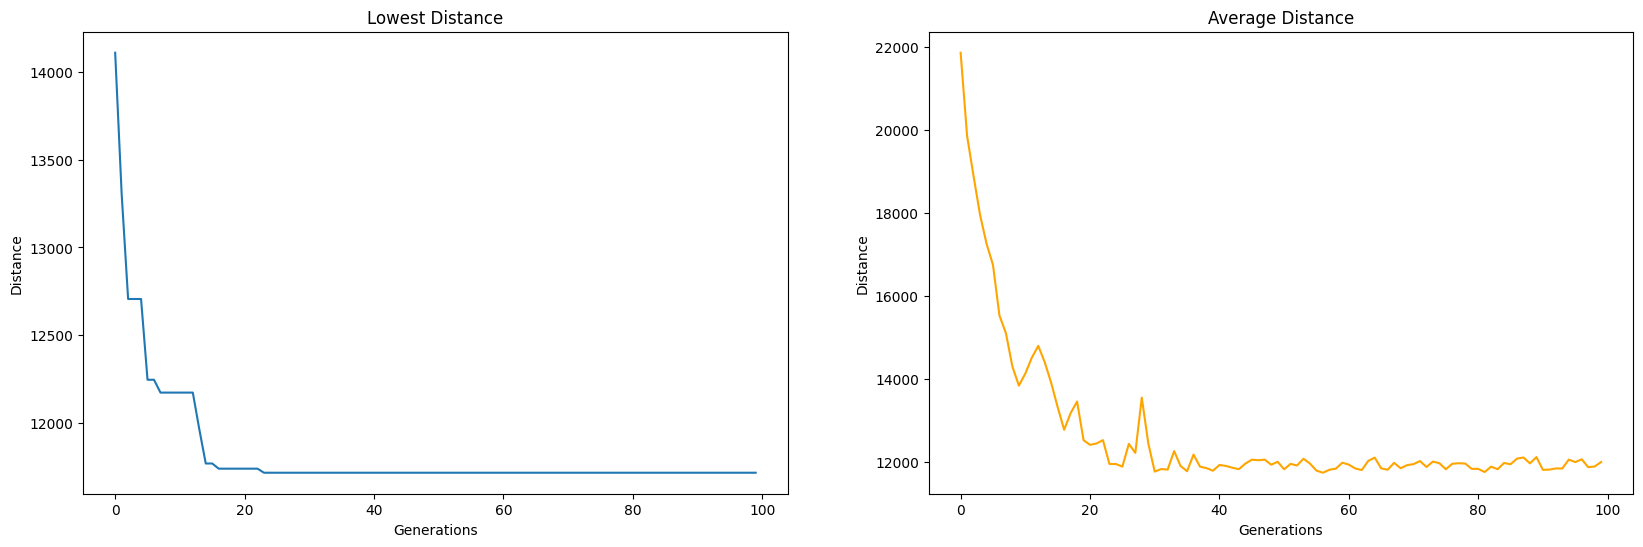

In [ ]:
with open('양손 최적화.json') as fp:
    learning = json.load(fp)
    
last_dist = 1000000000
min_dists = []
avg_dists = []
generations = len(learning['generations'])

for i in range(0, generations):
    min_dist = learning['generations'][str(i)]['min']
    avg_dist = learning['generations'][str(i)]['avg']
    min_dists.append(min_dist)
    avg_dists.append(avg_dist)
    
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].plot(min_dists, label='Lowest Distance')
axes[0].set_xlabel('Generations')
axes[0].set_ylabel('Distance')
axes[0].set_title('Lowest Distance')

axes[1].plot(avg_dists, label='Average Distance', color='orange')
axes[1].set_xlabel('Generations')
axes[1].set_ylabel('Distance')
axes[1].set_title('Average Distance')

plt.savefig('양손 최적화.png')